In [ ]:
import os
import zipfile  
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

#  Define File Paths 
image_zip_path = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\image_chips_native-20250212T103727Z-001.zip"  # Update with correct filename
label_zip_path = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\labels-20250212T103318Z-001.zip"

image_extract_path = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\image_chips_native-20250212T103727Z-001"
label_extract_path = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\labels-20250212T103318Z-001"

In [ ]:
def unzip_file(zip_path, extract_path):
    
    if not os.path.exists(extract_path):  # Create folder if it doesn't exist
        os.makedirs(extract_path)

    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
        print(f"Extracted {zip_path} to {extract_path}")

unzip_file(image_zip_path, image_extract_path)
unzip_file(label_zip_path, label_extract_path)

Extracted C:\Users\DELL ADMIN\OneDrive - iitgn.ac.in\Desktop\sss\image_chips_native-20250212T103727Z-001.zip to C:\Users\DELL ADMIN\OneDrive - iitgn.ac.in\Desktop\sss\image_chips_native-20250212T103727Z-001
Extracted C:\Users\DELL ADMIN\OneDrive - iitgn.ac.in\Desktop\sss\labels-20250212T103318Z-001.zip to C:\Users\DELL ADMIN\OneDrive - iitgn.ac.in\Desktop\sss\labels-20250212T103318Z-001


In [ ]:

labels_native_path = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\labels-20250212T103318Z-001\\labels\\labels_native"


In [4]:
image_files = {os.path.splitext(f)[0] for f in os.listdir("C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\image_chips_native-20250212T103727Z-001\\image_chips_native") if f.endswith(('.jpg', '.png', '.tif'))}
label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_native_path) if f.endswith(".txt")}

missing_labels = image_files - label_files
missing_images = label_files - image_files

print(f"Total Images: {len(image_files)}")
print(f"Total Labels: {len(label_files)}")
print(f"Images without labels: {len(missing_labels)}")
print(f"Labels without images: {len(missing_images)}")


Total Images: 2553
Total Labels: 2542
Images without labels: 11
Labels without images: 0


In [5]:
image_folder="C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\image_chips_native-20250212T103727Z-001\\image_chips_native"

In [ ]:
import shutil


filtered_image_folder = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\images_labeled"
os.makedirs(filtered_image_folder, exist_ok=True)

# Move only images that have labels
for img_name in label_files:  
    src_path = os.path.join(image_folder, img_name + ".tif")  
    dst_path = os.path.join(filtered_image_folder, img_name + ".tif")
    if os.path.exists(src_path):
        shutil.move(src_path, dst_path)

print(f"Moved {len(label_files)} images to {filtered_image_folder}")


Moved 2542 images to C:\Users\DELL ADMIN\OneDrive - iitgn.ac.in\Desktop\sss\images_labeled


Data Exploration and Understanding<br>
Dataset statistics 


How many instances of solar panels are present in the dataset?<br>
Compute and show the value counts of labels per image. E.g., X images have 0 labels, Y images have 1 label, … and so on.


Total Solar Panel Instances: 29625
81 images have 1 labels
167 images have 2 labels
221 images have 3 labels
218 images have 4 labels
217 images have 5 labels
189 images have 6 labels
170 images have 7 labels
184 images have 8 labels
169 images have 9 labels
121 images have 10 labels
97 images have 11 labels
84 images have 12 labels
69 images have 13 labels
49 images have 14 labels
46 images have 15 labels
41 images have 16 labels
36 images have 17 labels
25 images have 18 labels
29 images have 19 labels
14 images have 20 labels
4 images have 21 labels
1 images have 22 labels
4 images have 23 labels
2 images have 24 labels
4 images have 25 labels
3 images have 26 labels
5 images have 27 labels
5 images have 28 labels
15 images have 29 labels
20 images have 30 labels
8 images have 31 labels
7 images have 32 labels
13 images have 33 labels
19 images have 34 labels
10 images have 35 labels
6 images have 36 labels
17 images have 37 labels
13 images have 38 labels
6 images have 39 labels
9 

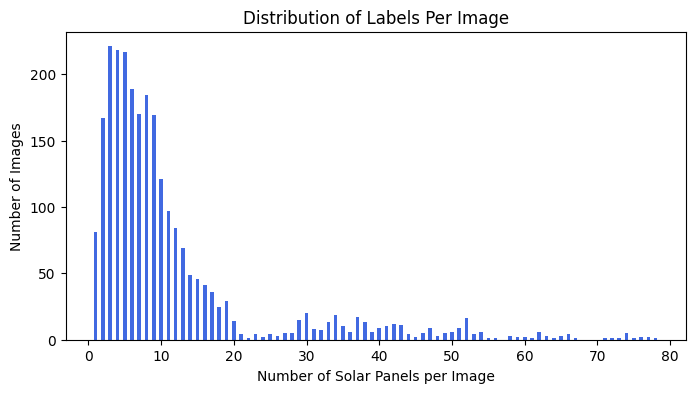

In [ ]:
import os
from collections import Counter


label_folder = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\labels-20250212T103318Z-001\\labels\\labels_native"

# Count bounding boxes per image
label_counts = []
for label_file in os.listdir(label_folder):
    if label_file.endswith(".txt"):
        with open(os.path.join(label_folder, label_file), "r") as f:
            num_boxes = len(f.readlines())  
            label_counts.append(num_boxes)

# Total solar panel instances
total_panels = sum(label_counts)
print(f"Total Solar Panel Instances: {total_panels}")

# Count frequency of labels per image
label_distribution = Counter(label_counts)


for num_labels, count in sorted(label_distribution.items()):
    print(f"{count} images have {num_labels} labels")


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(label_distribution.keys(), label_distribution.values(), width=0.5, color="royalblue")
plt.xlabel("Number of Solar Panels per Image")
plt.ylabel("Number of Images")
plt.title("Distribution of Labels Per Image")
plt.show()


Calculate the statistics of the area of solar panels in meters (Read label readme carefully for this question)<br>
What method was used to compute the area (in meters) for a single instance?


What is the mean area and standard deviation?<br>
Plot the histogram of areas. What do you observe?


The bounding box area was computed using pixel-to-meter conversion based on the 31 cm resolution (0.31 meters per pixel) of the dataset. The provided labels are in YOLO format, where width and height values are normalized between 0 and 1.

To get the actual bounding box dimensions in meters, the conversion formula is:

Width in meters = Width (normalized) × 416 × 0.31
Height in meters = Height (normalized) × 416 × 0.31
Area in square meters = Width in meters × Height in meters

This method ensures that the area is calculated accurately using the EPSG:32633 coordinate system, as described in README_Labels.txt.

Mean Area: 191.52 sq. meters
Standard Deviation: 630.70 sq. meters
Max Area: 12177.41 sq. meters


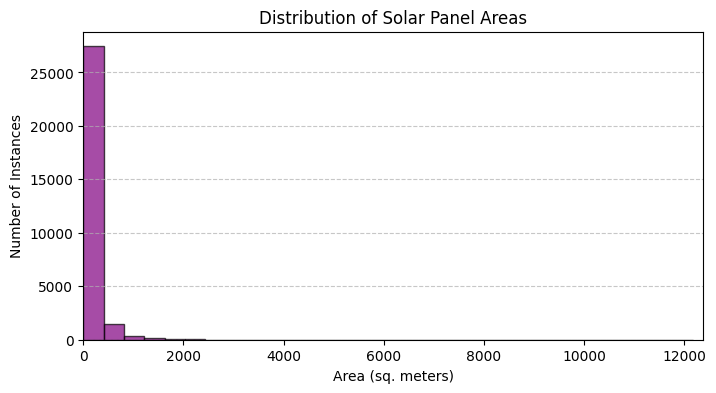

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt  

areas = []

# Process all label files
for label_file in glob.glob(os.path.join(label_folder, "*.txt")):
    with open(label_file, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 5:
                continue  # Skip invalid lines

            _, _, _, width, height = map(float, parts)

            # Convert width and height from normalized to meters
            real_width = width * 416 * 0.31
            real_height = height * 416 * 0.31
            area = real_width * real_height
            areas.append(area)

# Compute statistics
mean_area = np.mean(areas)
std_area = np.std(areas)

print(f"Mean Area: {mean_area:.2f} sq. meters")
print(f"Standard Deviation: {std_area:.2f} sq. meters")

# Print the max area correctly
if areas:  
    max_area = max(areas)
    print(f"Max Area: {max_area:.2f} sq. meters")
else:
    max_area = 0  
    print("No areas found.")

# Plot histogram of areas
plt.figure(figsize=(8, 4))
plt.hist(areas, bins=30, color="purple", alpha=0.7, edgecolor="black")
plt.xlabel("Area (sq. meters)")
plt.ylabel("Number of Instances")
plt.title("Distribution of Solar Panel Areas")


plt.xlim([0, max_area + 200])

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Implementing the Fundamental Functions

Compute IoU between two bounding boxes in YOLO format [x, y, width, height].<br>
Uses Shapely for geometric computations.<br>
    
bbox1, bbox2: [x_center, y_center, width, height] (normalized format)<br>


In [ ]:
from shapely.geometry import box

def compute_iou(bbox1, bbox2):
    
    # Convert [x, y, w, h] to absolute pixel coordinates
    def yolo_to_coords(bbox):
        x, y, w, h = bbox
        x_min = (x - w / 2) * 416
        y_min = (y - h / 2) * 416
        x_max = (x + w / 2) * 416
        y_max = (y + h / 2) * 416
        return box(x_min, y_min, x_max, y_max)  

    box1 = yolo_to_coords(bbox1)
    box2 = yolo_to_coords(bbox2)

    # Compute IoU
    intersection = box1.intersection(box2).area
    union = box1.area + box2.area - intersection
    return intersection / union if union > 0 else 0

# Example usage
bbox1 = [0.5, 0.5, 0.2, 0.2]  
bbox2 = [0.6, 0.6, 0.2, 0.2]
iou_value = compute_iou(bbox1, bbox2)
print(f"IoU between bbox1 and bbox2: {iou_value:.4f}")


IoU between bbox1 and bbox2: 0.1429


In [10]:
!pip install supervision


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import supervision as sv

In [ ]:


print(dir(sv))  


['BackgroundOverlayAnnotator', 'BaseDataset', 'BlurAnnotator', 'BoundingBoxAnnotator', 'BoxAnnotator', 'BoxCornerAnnotator', 'ByteTrack', 'CSVSink', 'CircleAnnotator', 'ClassificationDataset', 'Classifications', 'Color', 'ColorAnnotator', 'ColorLookup', 'ColorPalette', 'ConfusionMatrix', 'CropAnnotator', 'DetectionDataset', 'Detections', 'DetectionsSmoother', 'DotAnnotator', 'EdgeAnnotator', 'EllipseAnnotator', 'FPSMonitor', 'HaloAnnotator', 'HeatMapAnnotator', 'IconAnnotator', 'ImageSink', 'InferenceSlicer', 'JSONSink', 'KeyPoints', 'LMM', 'LabelAnnotator', 'LineZone', 'LineZoneAnnotator', 'LineZoneAnnotatorMulticlass', 'MaskAnnotator', 'MeanAveragePrecision', 'OrientedBoxAnnotator', 'OverlapFilter', 'PercentageBarAnnotator', 'PixelateAnnotator', 'Point', 'PolygonAnnotator', 'PolygonZone', 'PolygonZoneAnnotator', 'Position', 'Rect', 'RichLabelAnnotator', 'RoundBoxAnnotator', 'TraceAnnotator', 'TriangleAnnotator', 'VertexAnnotator', 'VertexLabelAnnotator', 'VideoInfo', 'VideoSink', '__

Using supervision for IoU

In [ ]:
iou_shapely=iou_value
def yolo_to_pixel(bbox, img_size=416):
    x, y, w, h = bbox
    x_min = (x - w / 2) * img_size
    y_min = (y - h / 2) * img_size
    x_max = (x + w / 2) * img_size
    y_max = (y + h / 2) * img_size
    return np.array([x_min, y_min, x_max, y_max])

bbox1_pixel = yolo_to_pixel(bbox1)
bbox2_pixel = yolo_to_pixel(bbox2)

# Use `sv.Detections.iou_matrix()` to compute IoU
iou_supervision =  sv.box_iou_batch(np.array([bbox1_pixel]), np.array([bbox2_pixel]))[0, 0]


print(f"IoU using Shapely: {iou_shapely:.4f}")
print(f"IoU using supervision: {iou_supervision:.4f}")

IoU using Shapely: 0.1429
IoU using supervision: 0.1429


Compute Precision and Recall for predicted bounding boxes.<br>
    
gt_boxes: List of ground truth boxes in [x_min, y_min, x_max, y_max] format<br>
pred_boxes: List of predicted boxes in [x_min, y_min, x_max, y_max] format<br>
scores: List of confidence scores for predictions<br>
iou_threshold: IoU threshold to consider a prediction as True Positive<br>

Compute Average Precision (AP) <br>
Use Pascal VOC 11 point interpolation method to implement the function


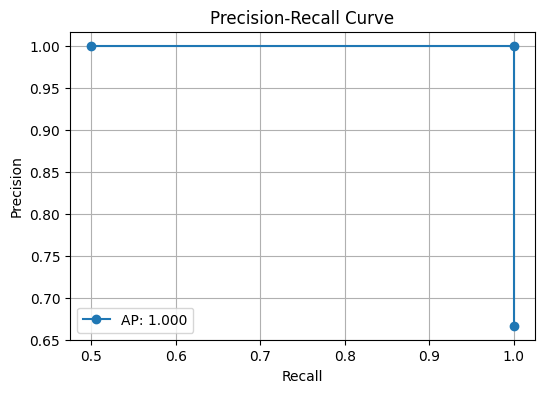

Average Precision (AP): 1.000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_precision_recall(gt_boxes, pred_boxes, scores, iou_threshold=0.5):
    # Sort predictions by confidence score (descending order)
    sorted_indices = np.argsort(-np.array(scores))
    pred_boxes = np.array(pred_boxes)[sorted_indices]
    
    tp = np.zeros(len(pred_boxes))  # True Positives
    fp = np.zeros(len(pred_boxes))  # False Positives
    gt_matched = set()  
    
    # Compute IoU for each prediction
    for i, pred in enumerate(pred_boxes):
        ious = sv.box_iou_batch(np.array([pred]), np.array(gt_boxes))[0]
        max_iou = np.max(ious)
        max_iou_idx = np.argmax(ious)

        if max_iou >= iou_threshold and max_iou_idx not in gt_matched:
            tp[i] = 1  # True positive
            gt_matched.add(max_iou_idx)
        else:
            fp[i] = 1  # False positive

    # Compute Precision and Recall
    tp_cumsum = np.cumsum(tp)
    fp_cumsum = np.cumsum(fp)
    
    precision = tp_cumsum / (tp_cumsum + fp_cumsum + 1e-10)  # Avoid division by zero
    recall = tp_cumsum / len(gt_boxes)

    return precision, recall

#Compute Average Precision using the 11-point Pascal VOC interpolation method.
    
def compute_ap(precision, recall):
    
    recall_levels = np.linspace(0, 1, 11)  # Recall at 0.0, 0.1, ..., 1.0
    ap = 0.0

    for r in recall_levels:
        precision_at_r = np.max(precision[recall >= r]) if np.any(recall >= r) else 0
        ap += precision_at_r / 11.0

    return ap

# Example Ground Truth & Predictions
gt_boxes = [[50, 50, 200, 200], [300, 300, 450, 450]]  
pred_boxes = [[55, 55, 195, 195], [305, 305, 460, 460], [100, 100, 150, 150]]  
scores = [0.9, 0.8, 0.4]  


precision, recall = compute_precision_recall(gt_boxes, pred_boxes, scores, iou_threshold=0.5)


ap = compute_ap(precision, recall)


plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker="o", linestyle="-", label=f"AP: {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

print(f"Average Precision (AP): {ap:.3f}")


Compute Average Precision using the COCO 101-point interpolation method.

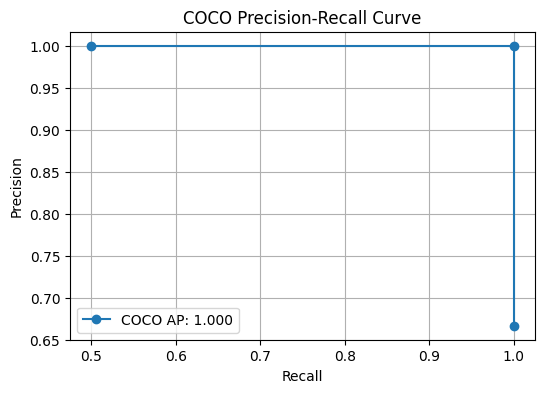

COCO Average Precision (AP): 1.000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_ap_coco(precision, recall):
   
    recall_levels = np.linspace(0, 1, 101)  # Recall at 0.00, 0.01, ..., 1.00
    ap = 0.0

    for r in recall_levels:
        precision_at_r = np.max(precision[recall >= r]) if np.any(recall >= r) else 0
        ap += precision_at_r / 101.0

    return ap

# Example Ground Truth & Predictions
gt_boxes = [[50, 50, 200, 200], [300, 300, 450, 450]]  
pred_boxes = [[55, 55, 195, 195], [305, 305, 460, 460], [100, 100, 150, 150]]  
scores = [0.9, 0.8, 0.4]  

# Compute Precision-Recall using our previous function
precision, recall = compute_precision_recall(gt_boxes, pred_boxes, scores, iou_threshold=0.5)

# Compute COCO AP
ap_coco = compute_ap_coco(precision, recall)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker="o", linestyle="-", label=f"COCO AP: {ap_coco:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("COCO Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

print(f"COCO Average Precision (AP): {ap_coco:.3f}")


Randomly generate 10 images of size 100x100. Randomly generate 10 ground truth boxes of size 20x20 and 10 predicted boxes of size 20x20 in each image. Assume there is only one class of objects. Compare the AP50 (Average Precision at IoU 0.5) computed by 3 of your methods


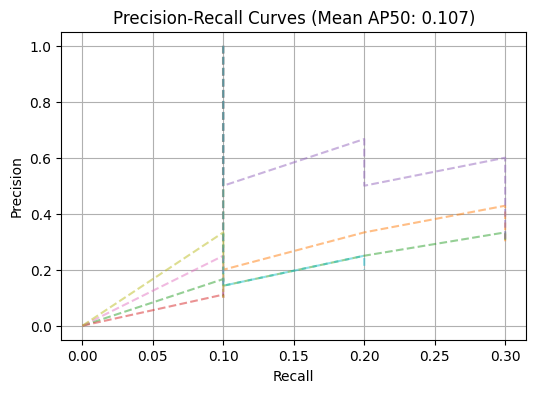

Mean AP50 on Random Data: 0.107


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate Random GT & Predicted Boxes 
def generate_random_boxes(num_images=10, num_boxes=10, img_size=100):
    
    all_boxes = {}
    for i in range(num_images):
        boxes = []
        for _ in range(num_boxes):
            x_min = random.randint(0, img_size - 20)
            y_min = random.randint(0, img_size - 20)
            x_max = x_min + 20
            y_max = y_min + 20
            boxes.append([x_min, y_min, x_max, y_max])
        all_boxes[i] = boxes  # Store boxes for each image
    return all_boxes

# Generate 10 images, each with 10 random ground truth & predicted boxes
gt_boxes_dict = generate_random_boxes(num_images=10, num_boxes=10)
pred_boxes_dict = generate_random_boxes(num_images=10, num_boxes=10)
scores_dict = {i: [random.uniform(0.4, 1.0) for _ in range(10)] for i in range(10)}  # Random confidence scores

#  Compute AP50 for Each Image 
ap50_list = []

for img_id in range(10):
    gt_boxes = gt_boxes_dict[img_id]
    pred_boxes = pred_boxes_dict[img_id]
    scores = scores_dict[img_id]

    precision, recall = compute_precision_recall(gt_boxes, pred_boxes, scores, iou_threshold=0.5)
    ap50 = compute_ap(precision, recall)
    ap50_list.append(ap50)

#  Compute Overall AP50 
mean_ap50 = np.mean(ap50_list)

#  Plot Precision-Recall Curve 
plt.figure(figsize=(6, 4))
for img_id in range(10):
    precision, recall = compute_precision_recall(gt_boxes_dict[img_id], pred_boxes_dict[img_id], scores_dict[img_id], iou_threshold=0.5)
    plt.plot(recall, precision, linestyle="--", alpha=0.5)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curves (Mean AP50: {mean_ap50:.3f})")
plt.grid()
plt.show()

print(f"Mean AP50 on Random Data: {mean_ap50:.3f}")


In [19]:
!pip install ultralytics supervision opencv-python



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Split the data into 80-20 train-test split. Use 10% of training data as validation.

In [20]:
import os
import shutil
import random
from ultralytics import YOLO
import supervision as sv
import cv2
import numpy as np
import json


In [21]:
import os

labels_folder = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\labels-20250212T103318Z-001\\labels\\labels_native"

# List all .txt label files
txt_files = [f for f in os.listdir(labels_folder) if f.endswith(".txt")]

print(f"Total label files found: {len(txt_files)}")
print("Example files:", txt_files[:5])  # Show first 5 files


Total label files found: 2542
Example files: ['solarpanels_native_1__x0_0_y0_6845_dxdy_416.txt', 'solarpanels_native_1__x0_0_y0_6963_dxdy_416.txt', 'solarpanels_native_1__x0_0_y0_7119_dxdy_416.txt', 'solarpanels_native_1__x0_0_y0_7229_dxdy_416.txt', 'solarpanels_native_1__x0_0_y0_7230_dxdy_416.txt']


In [22]:
label_file = os.path.join(labels_folder, txt_files[0])  # Pick the first label file
with open(label_file, "r") as f:
    lines = f.readlines()
    print("Example Label File Content:", lines)


Example Label File Content: ['0 0.8725961538461539 0.7007211538461539 0.057692307692307696 0.05528846153846154\n', '0 0.6201923076923077 0.6826923076923077 0.04326923076923077 0.038461538461538464\n', '0 0.7235576923076924 0.7548076923076924 0.05288461538461539 0.05288461538461539\n', '0 0.875 0.9350961538461539 0.028846153846153848 0.028846153846153848\n', '0 0.9158653846153847 0.9591346153846154 0.04326923076923077 0.03365384615384616\n', '0 0.9627403846153847 0.9963942307692308 0.040865384615384616 0.007211538461538462\n', '0 0.3245192307692308 0.9663461538461539 0.057692307692307696 0.0625\n', '0 0.6586538461538461 0.7223557692307693 0.038461538461538464 0.03125\n']


In [22]:
from PIL import Image
import os

# Paths
image_folder = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\images_labeled"
output_folder = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\images_jpg"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert all .tif images to .jpg
for file in os.listdir(image_folder):
    if file.endswith(".tif"):
        img_path = os.path.join(image_folder, file)
        img = Image.open(img_path)
        
        # Convert and save as .jpg
        new_filename = file.replace(".tif", ".jpg")
        img.convert("RGB").save(os.path.join(output_folder, new_filename), "JPEG")

        print(f"✅ Converted {file} to {new_filename}")

print("✅ All .tif images converted to .jpg!")


✅ Converted solarpanels_native_1__x0_0_y0_6845_dxdy_416.tif to solarpanels_native_1__x0_0_y0_6845_dxdy_416.jpg
✅ Converted solarpanels_native_1__x0_0_y0_6963_dxdy_416.tif to solarpanels_native_1__x0_0_y0_6963_dxdy_416.jpg
✅ Converted solarpanels_native_1__x0_0_y0_7119_dxdy_416.tif to solarpanels_native_1__x0_0_y0_7119_dxdy_416.jpg
✅ Converted solarpanels_native_1__x0_0_y0_7229_dxdy_416.tif to solarpanels_native_1__x0_0_y0_7229_dxdy_416.jpg
✅ Converted solarpanels_native_1__x0_0_y0_7230_dxdy_416.tif to solarpanels_native_1__x0_0_y0_7230_dxdy_416.jpg
✅ Converted solarpanels_native_1__x0_0_y0_7249_dxdy_416.tif to solarpanels_native_1__x0_0_y0_7249_dxdy_416.jpg
✅ Converted solarpanels_native_1__x0_0_y0_7303_dxdy_416.tif to solarpanels_native_1__x0_0_y0_7303_dxdy_416.jpg
✅ Converted solarpanels_native_1__x0_0_y0_7418_dxdy_416.tif to solarpanels_native_1__x0_0_y0_7418_dxdy_416.jpg
✅ Converted solarpanels_native_1__x0_0_y0_7513_dxdy_416.tif to solarpanels_native_1__x0_0_y0_7513_dxdy_416.jpg
✅

In [25]:
import os
import shutil
import random

# Paths
image_folder = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\images_jpg"  # Update this
label_folder = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\labels-20250212T103318Z-001\\labels\\labels_native"
output_dir = "C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\sss\\yolo_dataset_jpj"

# Create train, val, test folders
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_dir, "images", split), exist_ok=True)
    os.makedirs(os.path.join(output_dir, "labels", split), exist_ok=True)

# Get all image file names (assuming .jpg format)
image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]
random.shuffle(image_files)

# Split dataset (80% train, 10% val, 10% test)
train_split = int(0.8 * len(image_files))
val_split = int(0.9 * len(image_files))

train_files = image_files[:train_split]
val_files = image_files[train_split:val_split]
test_files = image_files[val_split:]

# Function to move files
def move_files(file_list, split):
    for file in file_list:
        # Move images
        shutil.copy(os.path.join(image_folder, file), os.path.join(output_dir, "images", split, file))

        # Move labels (if they exist)
        label_file = file.replace(".jpg", ".txt")
        if os.path.exists(os.path.join(label_folder, label_file)):
            shutil.copy(os.path.join(label_folder, label_file), os.path.join(output_dir, "labels", split, label_file))

# Move files to respective folders
move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")

print("✅ Dataset organized successfully!")


✅ Dataset organized successfully!


In [28]:
import shutil

# Paths
dataset_path = "C:\\yolo_dataset_jpj"
zip_path = "C:\\yolo_dataset_jpj.zip"

# Create a zip file
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', dataset_path)

print(f"✅ Dataset zipped successfully: {zip_path}")


✅ Dataset zipped successfully: C:\yolo_dataset_jpj.zip
